# Amaç : Kernal oluşturarak gürültü azaltmak
Morphological Transformations dökümantasyon sayfası linki : https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# okuma ve gösterme için fonksiyon
def load_img():
    blank_img=np.zeros((600,600))
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,'ABCDE',(50,300),font,5,(255,255,255),30)
    return blank_img

In [3]:
# fotoğrafın size sini değiştirmek için fonksiyon yaızyoruz
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,'gray')

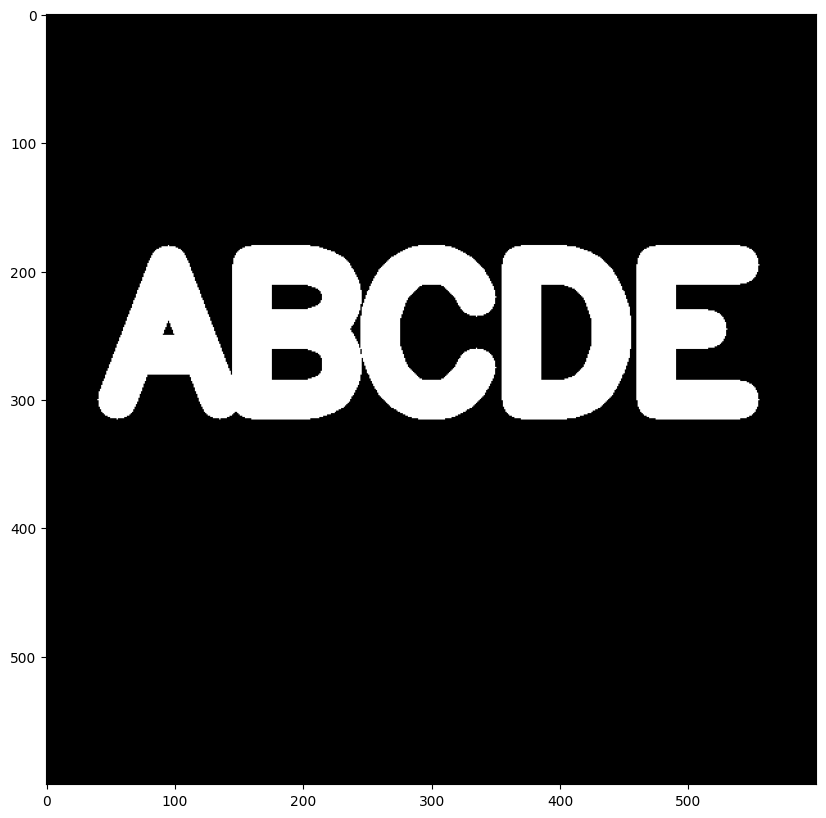

In [4]:
img=load_img()
display_img(img)

In [5]:
kernal=np.ones((5,5),dtype=np.uint8) # her elemanı 1 olan 5e 5lik kernal oluşturduk
kernal

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

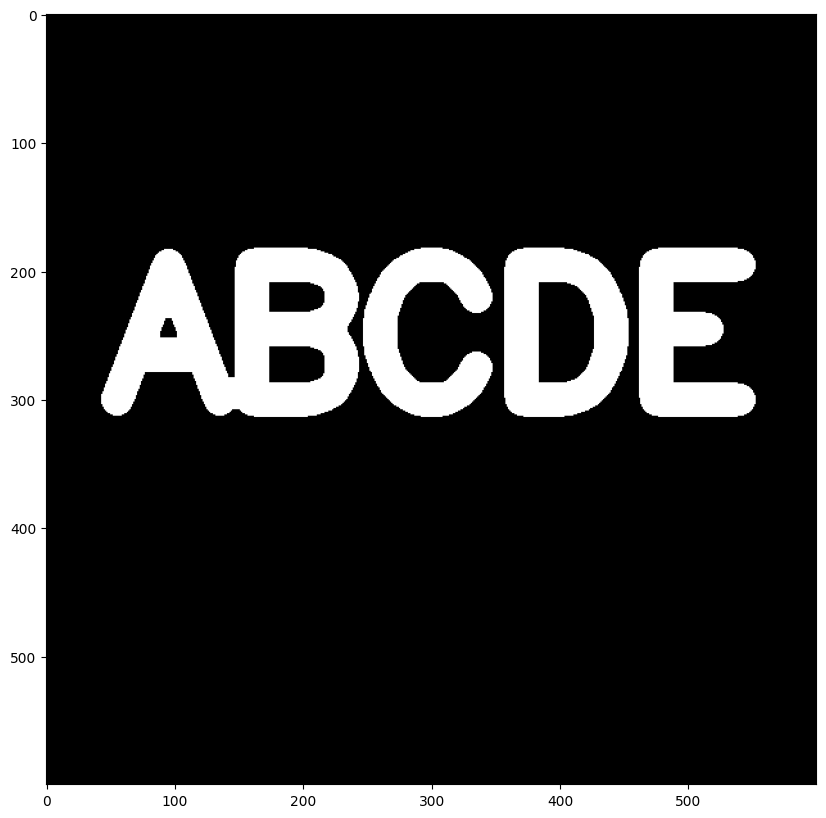

In [6]:
# aşındırma işlemi gerçekleştireceğiz
result=cv2.erode(img,kernel=kernal,iterations=1)
display_img(result)

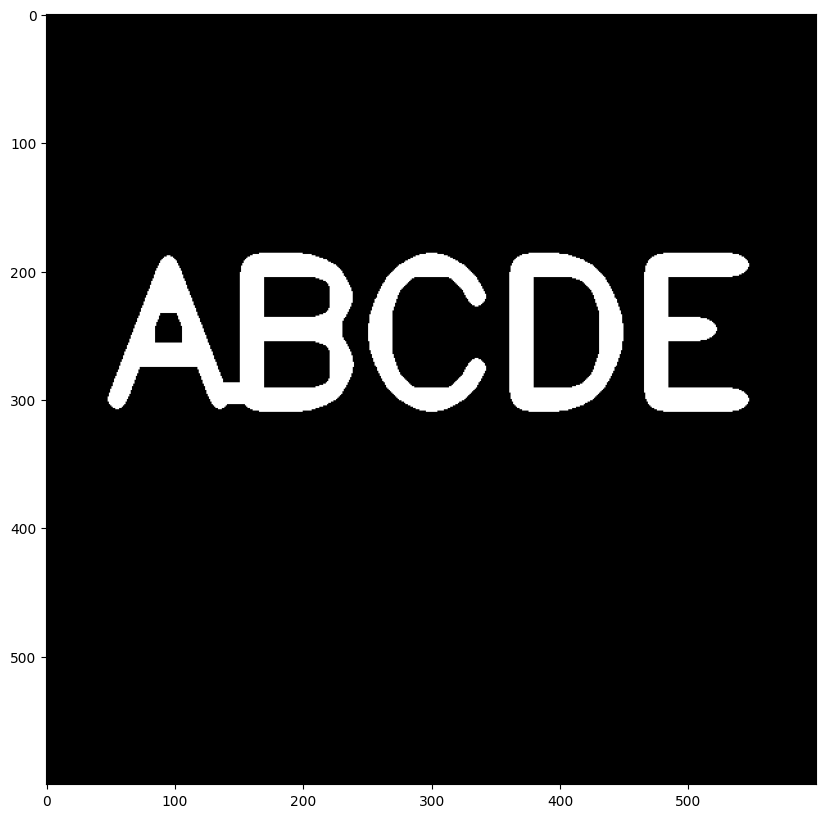

In [7]:
result=cv2.erode(img,kernel=kernal,iterations=3) # iterasyon arttırırsak ne olur
display_img(result)

Evet, tabii ki! cv2.erode fonksiyonu, görüntüdeki beyaz nesnelerin kenarlarını aşındırmak için kullanılan bir morfolojik işlemdir. Bu işlem, görüntüdeki beyaz pikselleri, etrafındaki siyah piksellerle "aşındırarak" küçültür. Bu, nesnelerin kenarlarını vurgulamak, küçük boşlukları doldurmak veya görüntüdeki gürültüyü azaltmak için sıklıkla kullanılır.
<br>
Fonksiyonun temel parametreleri şunlardır:<br>

* img: İşlem yapılacak giriş görüntüsü.
* kernel: Aşındırma işlemi için kullanılacak yapılandırma elemanı (kernel). Genellikle, bu kernel, aşındırma işlemi sırasında kullanılacak pencerenin şeklini ve boyutunu belirler.
* iterations: Aşındırma işleminin kaç kez tekrarlanacağını belirten bir parametre. Her tekrarda, işlem bir öncekine göre daha fazla etki eder.

In [8]:
# şimdi fotoğrafımızı gürültü ekleyip giriltiden kurtulmaya çalışacağız
img=load_img()
white_noise=np.random.randint(low=0,high=2,size=(600,600)) # gürültümü oluşturdum
white_noise

array([[0, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]])

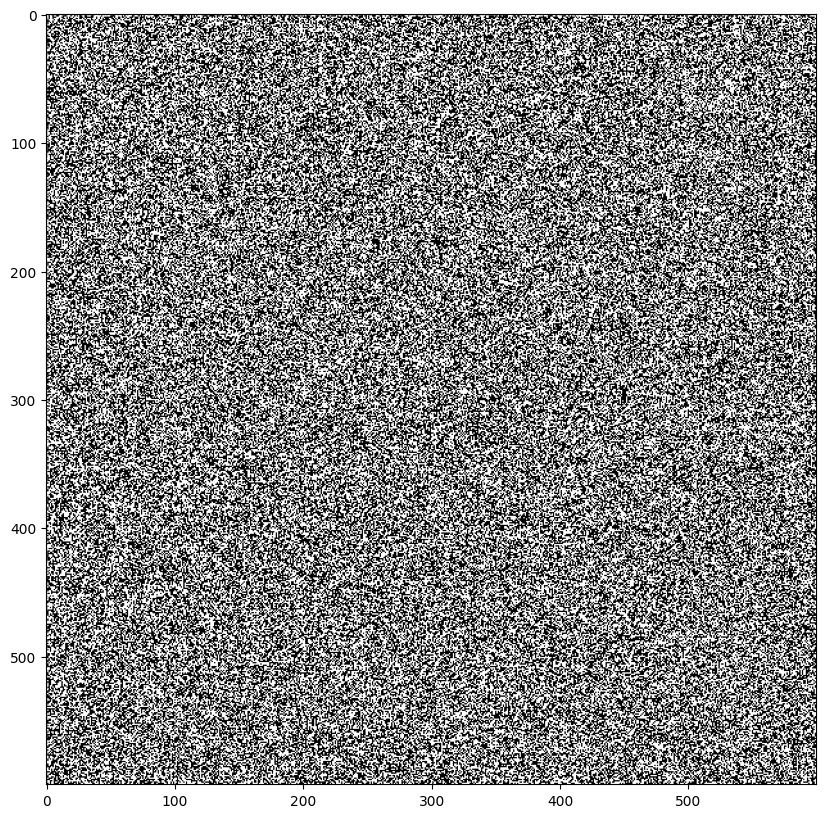

In [9]:
display_img(white_noise)

In [10]:
img.max()

255.0

In [11]:
# oranı tutturabilmek için gürltümü de fotoğrafımın en yüksek değeriyle çarpıp oran tutturacağım
white_noise=white_noise*255
white_noise

array([[  0, 255,   0, ..., 255,   0, 255],
       [255, 255,   0, ..., 255, 255, 255],
       [  0, 255,   0, ...,   0,   0, 255],
       ...,
       [  0, 255, 255, ...,   0, 255, 255],
       [  0, 255, 255, ...,   0,   0, 255],
       [  0,   0, 255, ...,   0,   0, 255]])

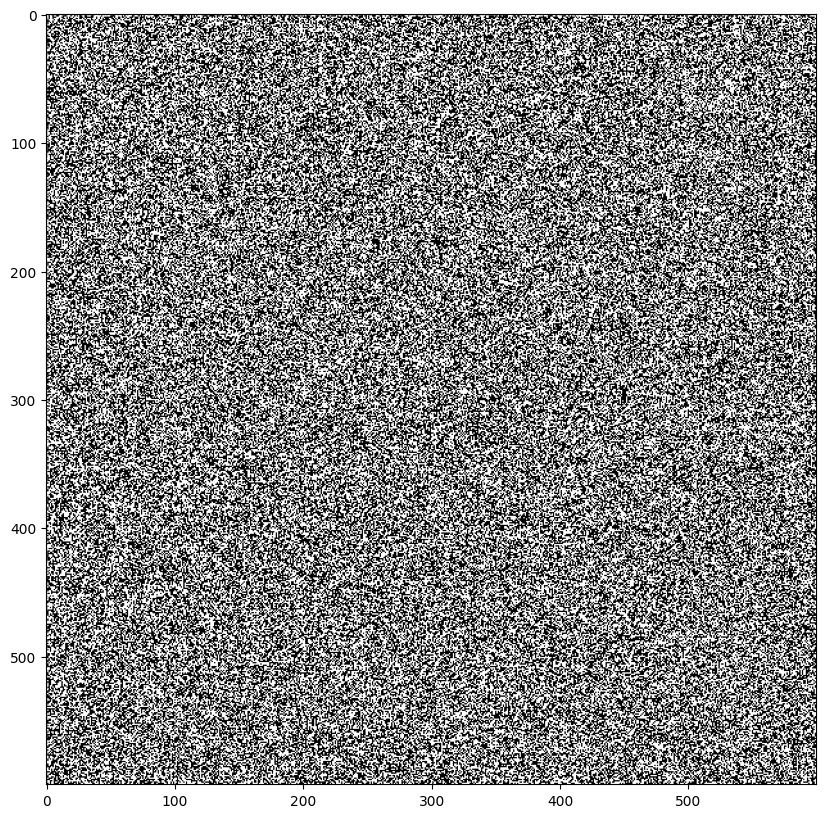

In [12]:
display_img(white_noise)

In [13]:
noise_img=img+white_noise
noise_img

array([[  0., 255.,   0., ..., 255.,   0., 255.],
       [255., 255.,   0., ..., 255., 255., 255.],
       [  0., 255.,   0., ...,   0.,   0., 255.],
       ...,
       [  0., 255., 255., ...,   0., 255., 255.],
       [  0., 255., 255., ...,   0.,   0., 255.],
       [  0.,   0., 255., ...,   0.,   0., 255.]])

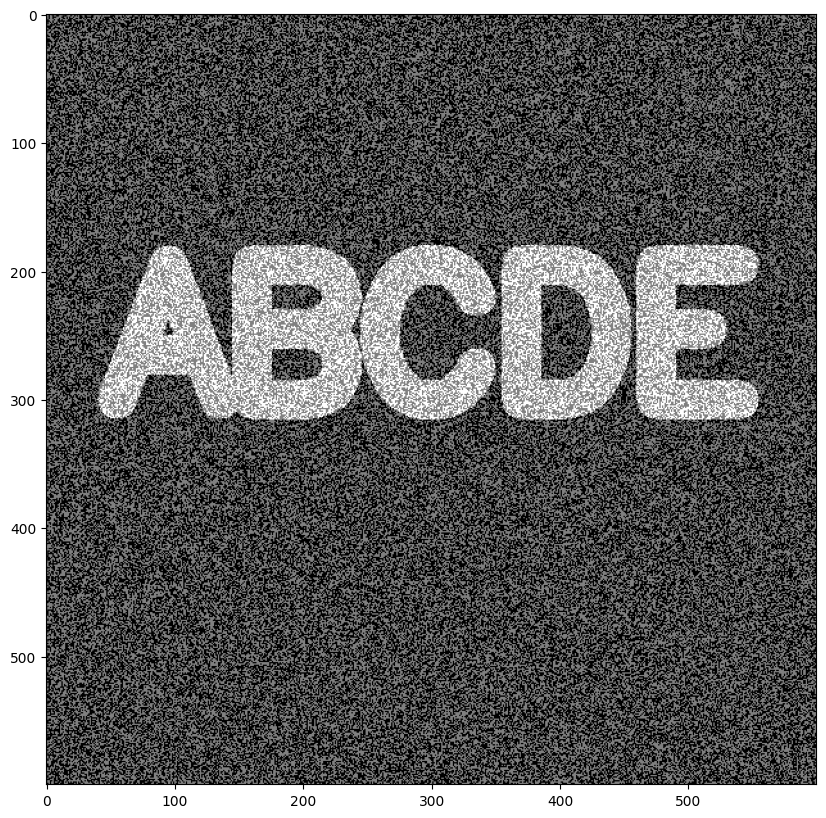

In [14]:
display_img(noise_img)

In [15]:
# şimdi de gürültülü fotoğrafımızdaki gürültülerden kurtulacağız
opening=cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernal)
opening

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

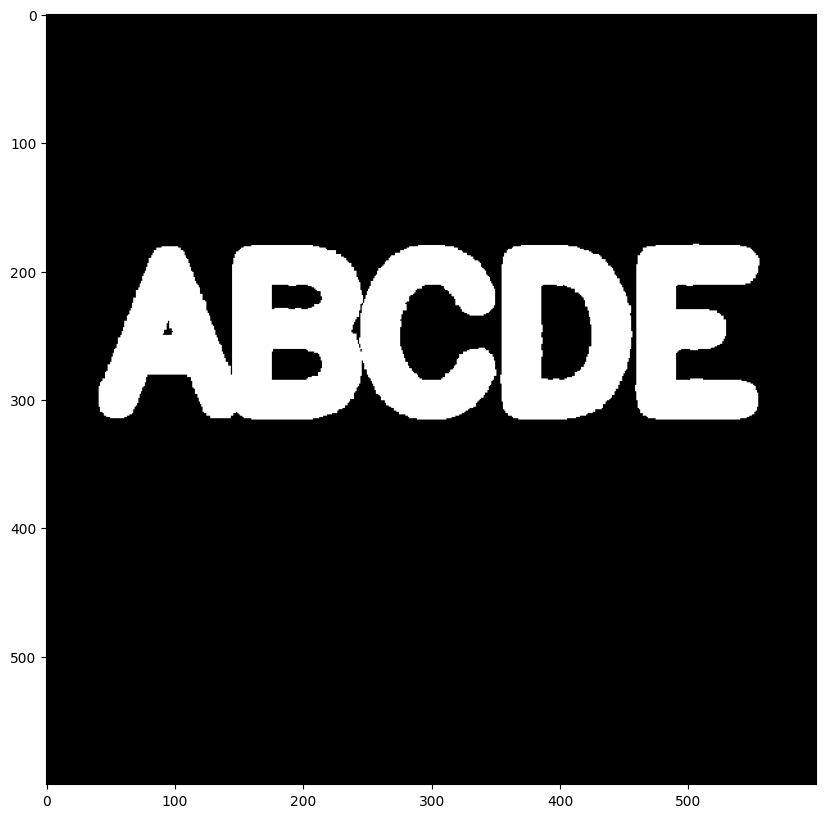

In [16]:
display_img(opening)

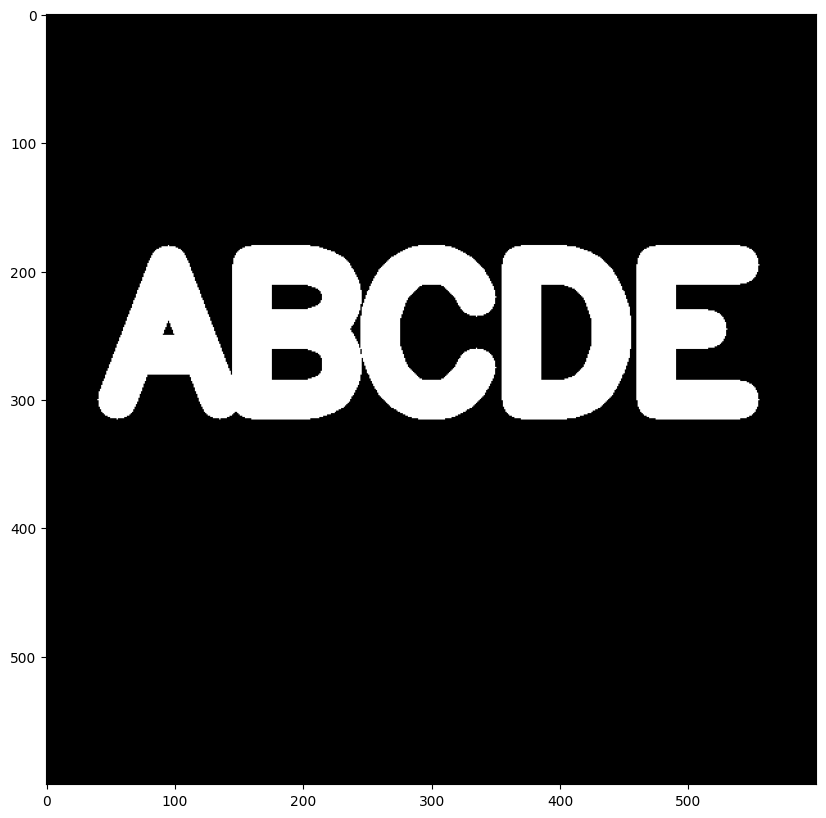

In [17]:
display_img(img) # ilk fotoğraf
# farkedildiği gibi birebir aynısı değil kernal değiştirerek daha çok yaklaşılabilr

Bu kod parçası, bir açma (opening) morfolojik işlemi uygular. Açma, sırasıyla erozyon ve sonra dilatasyon işlemlerini içeren bir işlemdir. Açma işlemi genellikle gürültüyü azaltmak, küçük nesneleri ortadan kaldırmak veya nesnelerin kenarlarını düzeltmek için kullanılır.<br>

İşte cv2.morphologyEx fonksiyonunun kullanımı:<br>

* noise_img: İşlem yapılacak giriş görüntüsü, genellikle gürültü içeren bir görüntü.
* cv2.MORPH_OPEN: Morfolojik işlemin türünü belirten bir bayrak. Bu durumda, açma işlemi uygulanır.
* kernal: Açma işlemi için kullanılacak yapılandırma elemanı (kernel). Genellikle, bu kernel, açma işlemi sırasında kullanılacak pencerenin şeklini ve boyutunu belirler.

In [18]:
# şimdi de harflerin içerisini gürültü uygulayıp bu gürültüden kurtulmaya çalışacağzı
img=load_img()
black_noise=np.random.randint(low=0,high=2,size=(600,600))
black_noise

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 1]])

In [19]:
black_noise=black_noise*-255

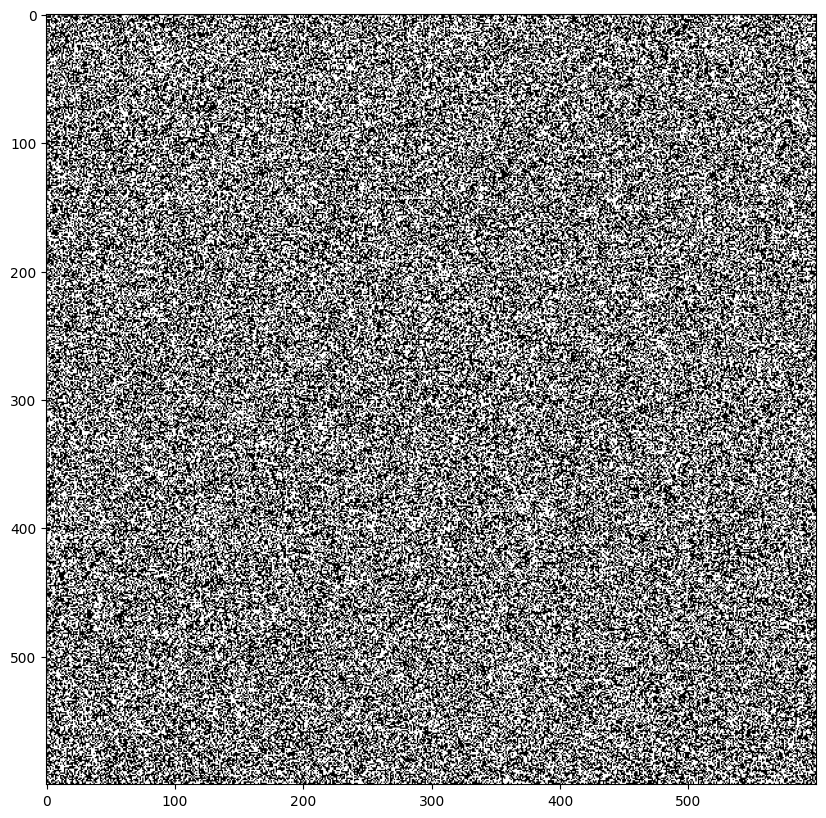

In [20]:
display_img(black_noise)

In [21]:
black_noise_img=img+black_noise # bunun sonucunda elde etmiş olduğum şey 0 olan siyah kısımlar -255 ile toplanıp -255 oldu ve
black_noise_img

array([[   0.,    0.,    0., ...,    0., -255.,    0.],
       [   0., -255., -255., ...,    0., -255., -255.],
       [-255., -255., -255., ..., -255., -255., -255.],
       ...,
       [-255., -255.,    0., ..., -255., -255.,    0.],
       [-255., -255., -255., ...,    0., -255.,    0.],
       [   0.,    0., -255., ...,    0.,    0., -255.]])

In [22]:
black_noise_img[black_noise_img==-255]=0 # burada da -255 olan kısımları 0 yap diyerek normalde siyah olan kısımları tekrardan siyah yapmış olduk
black_noise_img.min()

0.0

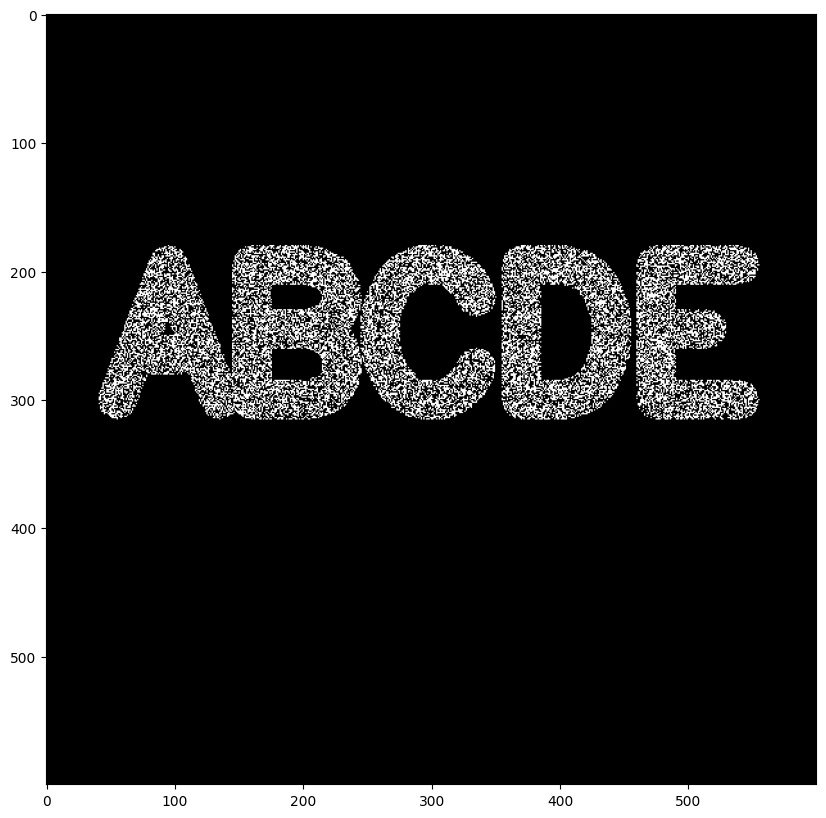

In [23]:
display_img(black_noise_img)

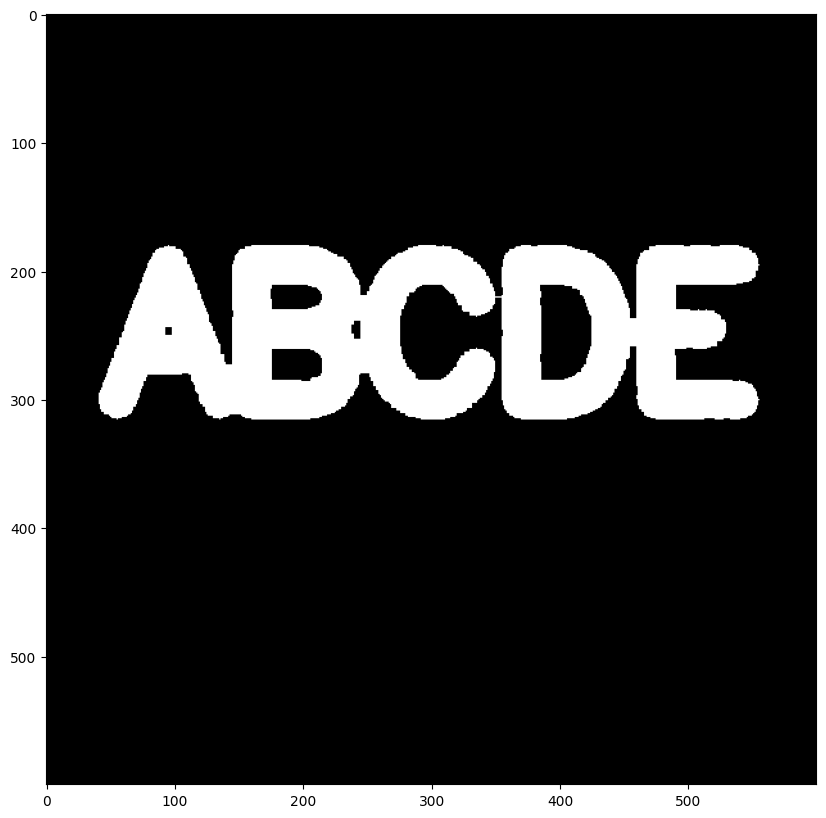

In [24]:
# şidmi de harflerim içerisindeki gürültüden kurtulacağız
closing=cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernal)
display_img(closing)

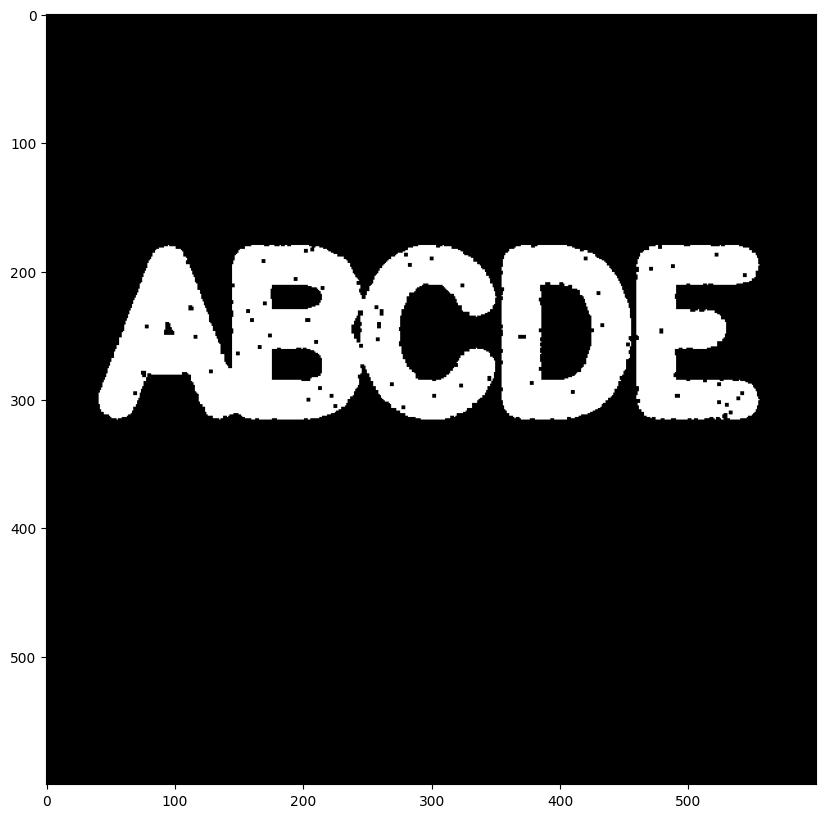

In [25]:
# kernal değeriyle oynamak istedim
kernal=np.ones((3,3),dtype=np.uint8)
closing=cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernal)
display_img(closing)

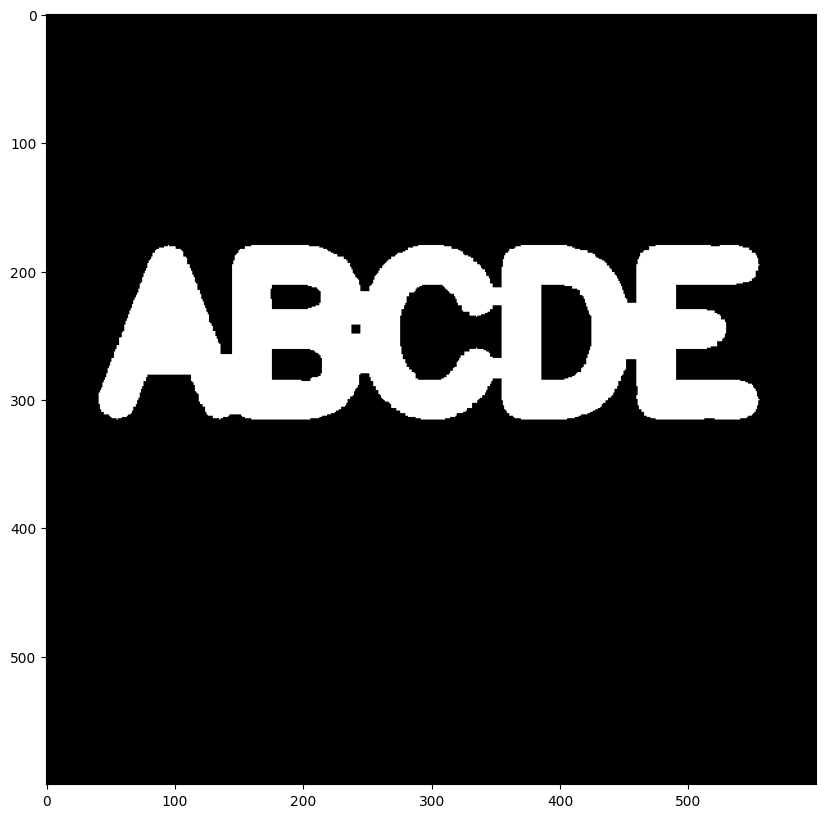

In [26]:
kernal=np.ones((7,7),dtype=np.uint8)
closing=cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernal)
display_img(closing)

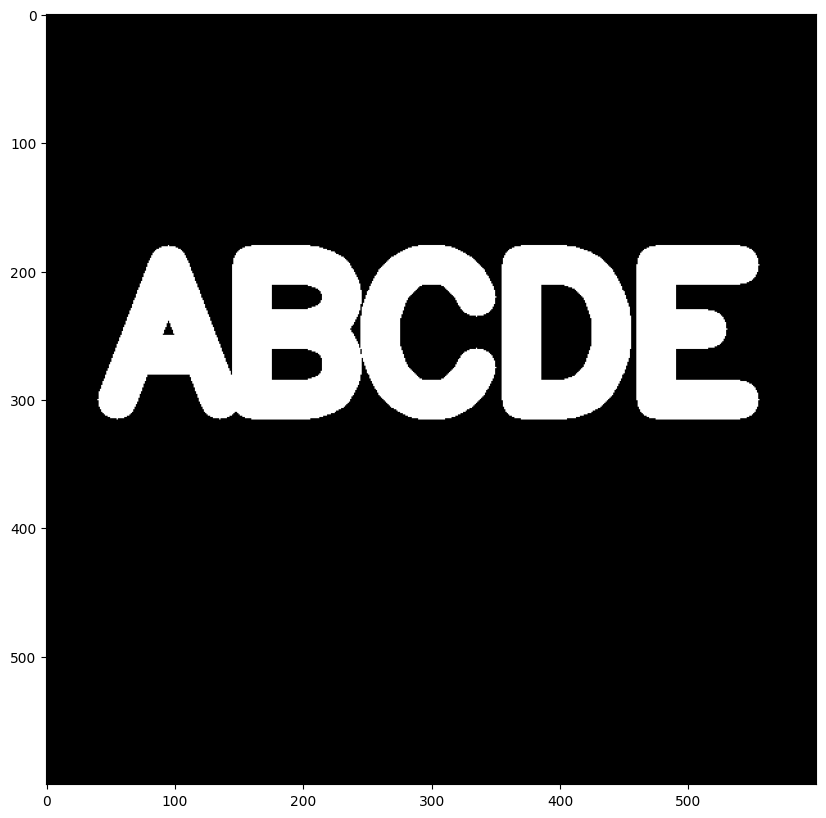

In [27]:
# Morphological Gradient kullanalım :
img=load_img()
display_img(img)

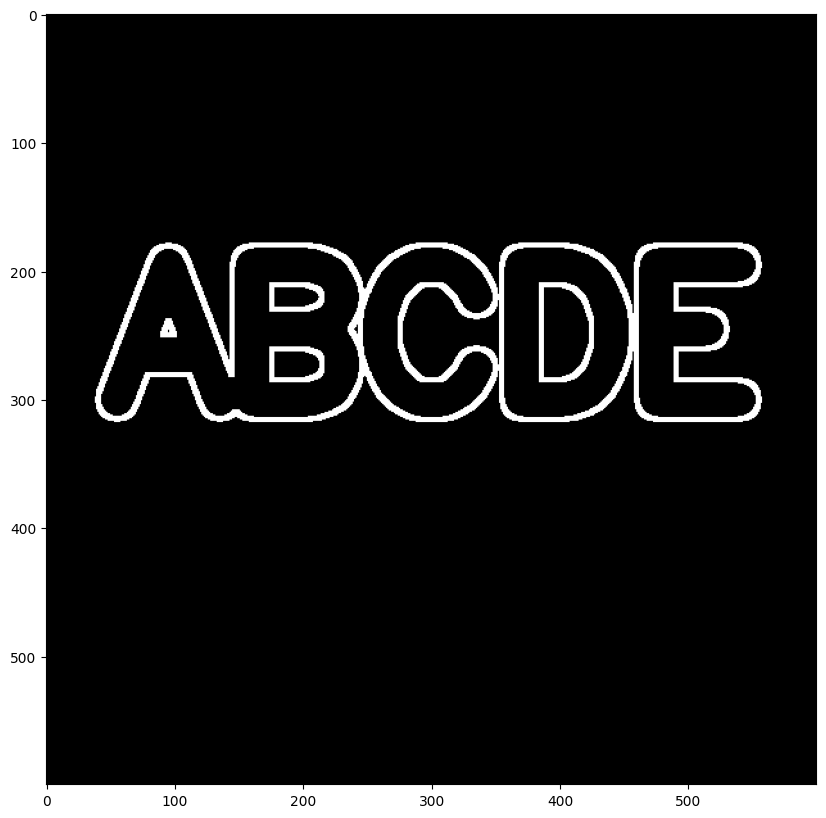

In [28]:
kernal=np.ones((5,5),dtype=np.uint8)
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernal)
display_img(gradient)